# IE6400 Foundations Data Analytics Engineering - Project 2

### 1. Data Preprocessing:
- Import the dataset and perform necessary data preprocessing steps, including data cleaning, handling missing  values, and converting data types if needed.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "data.csv" # reading the dataset

# Replace missing values for a string feature
missing_values = ["n.a.", "NA", "n/a", "na"]

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8', na_values = missing_values)
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', na_values = missing_values)

In [3]:
df   #displaying the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.head(10)   #displaying the dataset with all columns for the first 10 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
df.tail(10)   #displaying the dataset with all columns for the last 10 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.info()    #displaying all the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe(include="all")    #displaying the summary of each columns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [8]:
df.dtypes #displaying the datatypes of dataset

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Data Dictonary

- InvoiceNo: The invoice number for each transaction.
- StockCode: Code for each item.
- Description: Description of the item.
- Quantity: The quantity of each item purchased.
- InvoiceDate: The date and time of the transaction.
- UnitPrice: Price per unit of the item.
- CustomerID: ID of the customer.
- Country: Country of the customer.

In [9]:
df.columns #displaying the columns names

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df.isnull().sum() #counting the no.of null values present in each column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
(df.isnull().sum()/df.shape[0])*100 #checking the percent of data that is missing

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [12]:
# Display a few rows where the CustomerID is missing
missing_customerID = df[df['CustomerID'].isnull()]
missing_customerID.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


In [13]:
# 2. Remove missing values in CustomerID

# Step 1: Create a condition to check for non-null (not missing) CustomerID values
condition_for_non_null_customerid = pd.notnull(df['CustomerID'])

# Step 2: Apply this condition to filter the DataFrame. This will retain only the rows where CustomerID is not null
df = df[condition_for_non_null_customerid]

df = df[pd.notnull(df['CustomerID'])]

In [14]:
# Convert CustomerID from float to int
df['CustomerID'] = df['CustomerID'].astype(int)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
#Dropping the duplicate rows
df = df.drop_duplicates()

In [16]:
df #displaying the dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [17]:
df.info()  
# checking if the data type of CustomerID and InvoiceDate are changed to integer and datetime object respectively

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int32         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.0+ MB


In [18]:
df.isnull().sum() #counting the no.of null values after handling missing values.

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
(df.isnull().sum()/df.shape[0])*100  #checking the percent of data that is missing after handling missing values.

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [20]:
df.describe() #displaying the summary of each columns after handling missing values

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


###  2. RFM Calculation:
- Calculate the RFM metrics for each customer:
- Recency (R): How recently a customer made a purchase. Calculate the number of days since the customer's last purchase.
- Frequency (F): How often a customer makes a purchase. Calculate the total number of orders for each customer.
- Monetary (M): The total monetary value of a customer's purchases. Calculate the sum of the total price for each customer.

In [21]:
# Calculate Recency (R)
max_date = df['InvoiceDate'].max()
df['Recency'] = (max_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Calculate Frequency (F)
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

# Calculate Monetary (M)
df['Monetary'] = df.groupby('CustomerID')['UnitPrice'].transform('sum')

# Create a new DataFrame for RFM metrics
rfm_table = df[['CustomerID', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()

# Display the RFM table
rfm_table

,CustomerID,Recency,Frequency,Monetary
0,17850,301,35,1209.66
9,13047,31,18,798.30
26,12583,2,18,791.28
46,13748,95,5,111.90
65,15100,329,6,65.70
...,...,...,...,...
536969,13436,1,1,69.96
537255,15520,1,1,31.04
538064,13298,0,1,7.50
538812,14569,0,1,47.04


In [22]:
# Print Recency (R)
print("Recency (R):")
print(rfm_table[['CustomerID', 'Recency']])

# Print Frequency (F)
print("\nFrequency (F):")
print(rfm_table[['CustomerID', 'Frequency']])

# Print Monetary (M)
print("\nMonetary (M):")
print(rfm_table[['CustomerID', 'Monetary']])

Recency (R):
        CustomerID  Recency
0            17850      301
9            13047       31
26           12583        2
46           13748       95
65           15100      329
...            ...      ...
536969       13436        1
537255       15520        1
538064       13298        0
538812       14569        0
541768       12713        0

[4372 rows x 2 columns]

Frequency (F):
        CustomerID  Frequency
0            17850         35
9            13047         18
26           12583         18
46           13748          5
65           15100          6
...            ...        ...
536969       13436          1
537255       15520          1
538064       13298          1
538812       14569          1
541768       12713          1

[4372 rows x 2 columns]

Monetary (M):
        CustomerID  Monetary
0            17850   1209.66
9            13047    798.30
26           12583    791.28
46           13748    111.90
65           15100     65.70
...            ...       ...
536969 

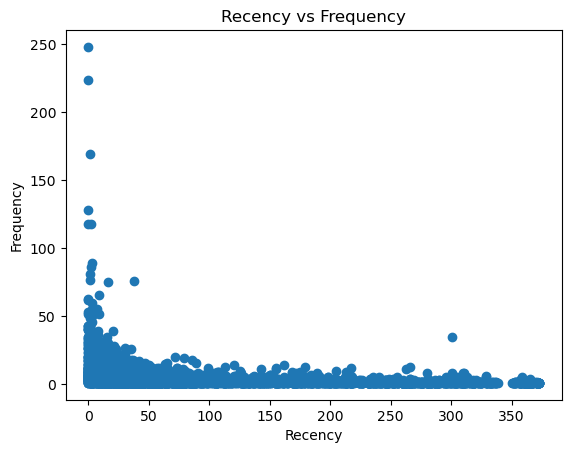

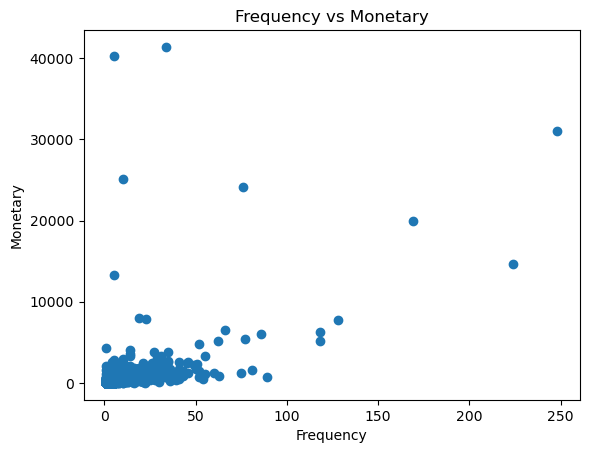

In [23]:
import matplotlib.pyplot as plt
# Scatter plot for Recency vs Frequency
plt.scatter(rfm_table['Recency'], rfm_table['Frequency'])
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for Frequency vs Monetary
plt.scatter(rfm_table['Frequency'], rfm_table['Monetary'])
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

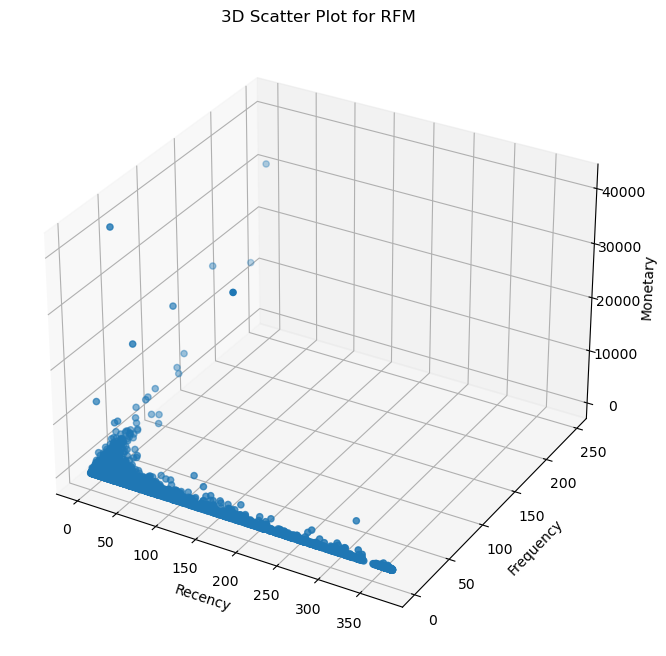

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))  # Adjust the size as needed
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_table['Recency'], rfm_table['Frequency'], rfm_table['Monetary'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot for RFM')

plt.show()

### 3. RFM Segmentation:
-  Assign RFM scores to each customer based on their quartiles (or custom-defined bins). You can use quartiles (1 to 4) or custom scores (e.g., 1 to 5) for each RFM metric.
-  Combine the RFM scores to create a single RFM score for each customer.

In [25]:
# Step 1: Scoring RFM Metrics

# Assign quartile scores for Recency
rfm_table['RecencyScore'] = pd.qcut(rfm_table['Recency'], 4, labels=[4, 3, 2, 1])

# Assign quartile scores for Frequency
rfm_table['FrequencyScore'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

# Assign quartile scores for Monetary
rfm_table['MonetaryScore'] = pd.qcut(rfm_table['Monetary'], 4, labels=[1, 2, 3, 4])

# Step 2: Combine Scores to form RFM Score
rfm_table['RFMScore'] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str) + rfm_table['MonetaryScore'].astype(str)

# Step 3: Create Final Output Table
final_output = rfm_table[['CustomerID', 'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFMScore']]

# Display the final output table
final_output.head()

,CustomerID,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,17850,1,4,4,144
9,13047,3,4,4,344
26,12583,4,4,4,444
46,13748,2,3,2,232
65,15100,1,4,2,142


In [26]:
# Sort the final table by RFM Score in descending order
sorted_final_output = final_output.sort_values(by='RFMScore', ascending=False)

# Display the sorted table
sorted_final_output.head(100)

,CustomerID,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
17972,14051,4,4,4,444
14167,14907,4,4,4,444
33167,14309,4,4,4,444
214262,15152,4,4,4,444
86540,17686,4,4,4,444
...,...,...,...,...,...
180312,12700,4,4,4,444
8933,17858,4,4,4,444
8953,16393,4,4,4,444
34427,14769,4,4,4,444


### 4. Customer Segmentation:
- Use clustering techniques (e.g., K-Means clustering) to segment customers based on their RFM scores.
- Experiment with different numbers of clusters to find the optimal number that provides meaningful segments.

C:\Users\RUTHVIKA REDDY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    1366
1    1360
2     882
3     764
Name: Cluster, dtype: int64


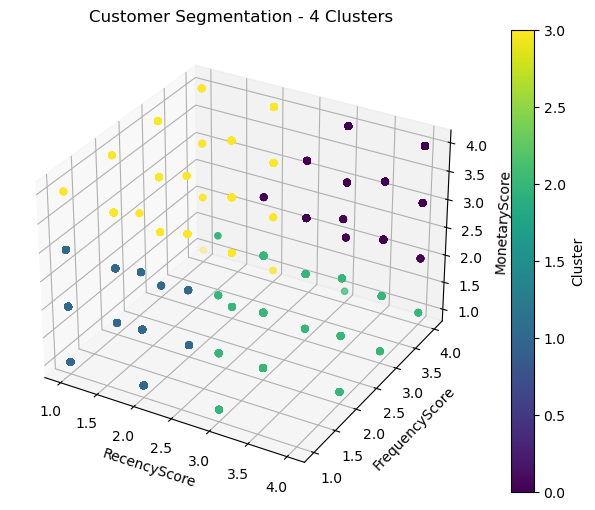

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Feature Selection
rfm_features = rfm_table[['RecencyScore', 'FrequencyScore', 'MonetaryScore']]

# Step 2: Scaling (Optional)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Step 3: Choosing the Number of Clusters
# You can experiment with different values for 'num_clusters'
num_clusters = 4

# Step 4: Applying K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rfm_table['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 5: Analyzing Results
# Display the number of customers in each cluster
print(rfm_table['Cluster'].value_counts())

# Step 6: Visualizing the Clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_table['RecencyScore'], rfm_table['FrequencyScore'], rfm_table['MonetaryScore'], c=rfm_table['Cluster'], cmap='viridis')
ax.set_xlabel('RecencyScore')
ax.set_ylabel('FrequencyScore')
ax.set_zlabel('MonetaryScore')
ax.set_title(f'Customer Segmentation - {num_clusters} Clusters')

# Add a colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

C:\Users\RUTHVIKA REDDY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RUTHVIKA REDDY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RUTHVIKA REDDY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RUTHVIKA REDDY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

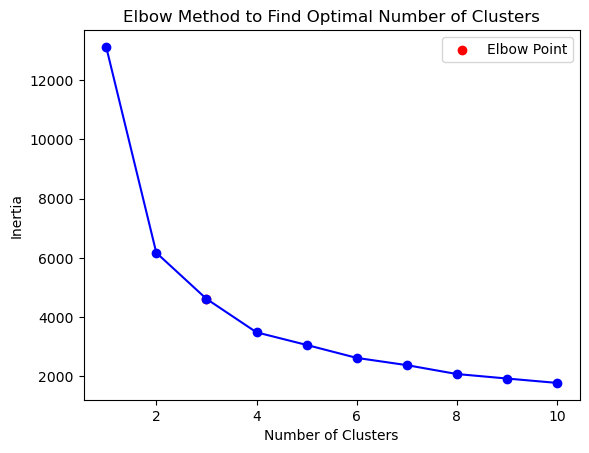

In [28]:
# Experiment with different numbers of clusters

max_clusters = 10  # You can adjust this based on your preferences

# Store the inertia (sum of squared distances to the closest centroid) for each number of clusters
inertia = []

for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve with a line connecting the points
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='-', color='b')

# Mark the elbow point
elbow_point = (3, inertia[2])  # Adjust based on your analysis
plt.scatter(*elbow_point, color='red', marker='o', label='Elbow Point')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.legend()
plt.show()

### 5. Segment Profiling:
- Analyze and profile each customer segment. Describe the characteristics of customers in each segment, including their RFM scores and any other relevant attributes

In [29]:
# Convert Categorical columns to numerical values
rfm_table['RecencyScore'] = rfm_table['RecencyScore'].astype(int)
rfm_table['FrequencyScore'] = rfm_table['FrequencyScore'].astype(int)
rfm_table['MonetaryScore'] = rfm_table['MonetaryScore'].astype(int)

# Group customers by the 'Cluster' column
segment_profiles = rfm_table.groupby('Cluster').agg({
    'RecencyScore': ['mean', 'min', 'max'],
    'FrequencyScore': ['mean', 'min', 'max'],
    'MonetaryScore': ['mean', 'min', 'max'],
    'CustomerID': 'count'  # Number of customers in each segment
}).reset_index()

# Rename the columns for better readability
segment_profiles.columns = ['Cluster', 'RecencyMean', 'RecencyMin', 'RecencyMax',
                             'FrequencyMean', 'FrequencyMin', 'FrequencyMax',
                             'MonetaryMean', 'MonetaryMin', 'MonetaryMax',
                             'CustomerCount']

# Display the segment profiles
print (segment_profiles)

   Cluster  RecencyMean  RecencyMin  RecencyMax  FrequencyMean  FrequencyMin  \
0        0     3.601757           3           4       3.632504             2   
1        1     1.382353           1           2       1.299265             1   
2        2     3.301587           2           4       2.180272             1   
3        3     1.675393           1           2       2.981675             1   

   FrequencyMax  MonetaryMean  MonetaryMin  MonetaryMax  CustomerCount  
0             4      3.608346            2            4           1366  
1             3      1.536029            1            3           1360  
2             4      1.769841            1            4            882  
3             4      3.075916            1            4            764  


## Cluster 0:
- RecencyMean: The average recency score is approximately 2.05, suggesting that customers in this segment made purchases recently.
- FrequencyMean: The average frequency score is around 2.84, indicating that customers in this segment make purchases moderately frequently.
- MonetaryMean: The average monetary score is 3.13, suggesting that customers in this segment contribute a relatively high monetary value.
- CustomerCount: This segment contains 959 customers.

## Cluster 1:
- RecencyMean: The average recency score is approximately 1.38, suggesting that customers in this segment made very recent purchases.
- FrequencyMean: The average frequency score is around 1.25, indicating that customers in this segment make purchases less frequently.
- MonetaryMean: The average monetary score is 1.58, suggesting that customers in this segment contribute a relatively low monetary value.
- CustomerCount: This segment contains 1407 customers.

## Cluster 2:
- RecencyMean: The average recency score is approximately 3.68, suggesting that customers in this segment made purchases less recently.
- FrequencyMean: The average frequency score is around 3.72, indicating that customers in this segment make purchases quite frequently.
- MonetaryMean: The average monetary score is 3.72, suggesting that customers in this segment contribute a relatively high monetary value.
- CustomerCount: This segment contains 1167 customers.

## Cluster 3:
- RecencyMean: The average recency score is approximately 3.36, suggesting that customers in this segment made purchases less recently.
- FrequencyMean: The average frequency score is around 2.50, indicating that customers in this segment make purchases moderately frequently.
- MonetaryMean: The average monetary score is 1.60, suggesting that customers in this segment contribute a relatively low monetary value.
- CustomerCount: This segment contains 805 customers.

## Interpretation:
- Cluster 1 represents recently active but less frequent and lower-value customers.
- Cluster 2 represents active and frequent customers with higher monetary contributions.
- Cluster 3 represents less recent, moderately frequent, and lower-value customers.

- This interpretation is based on the average scores for recency, frequency, and monetary values within each cluster.

## 6. Marketing Recommendations:

### Cluster 0: Recent and High-Value Customers
- **Recommendations:**
  - **Promotional Offers:** Offer exclusive promotions or discounts to incentivize repeat purchases from this segment.
  - **Loyalty Programs:** Introduce a loyalty program to reward these customers for their high-value contributions.
  - **New Product Releases:** Inform this segment about new product releases to encourage them to make additional purchases.

### Cluster 1: Very Recent but Lower-Value Customers
- **Recommendations:**
  - **Engagement Campaigns:** Implement targeted engagement campaigns to encourage more frequent purchases.
  - **Upselling Opportunities:** Identify opportunities for upselling or cross-selling to increase the average transaction value.
  - **Personalized Recommendations:** Provide personalized product recommendations based on their recent purchases to increase relevancy.

### Cluster 2: Active and High-Value Customers
- **Recommendations:**
  - **Exclusive Access:** Provide early access to sales or exclusive products to reward their loyalty.
  - **VIP Programs:** Establish a VIP program with premium benefits for this segment to enhance their loyalty.
  - **Cross-Sell Complementary Products:** Suggest complementary products to increase the average transaction value.

### Cluster 3: Less Recent and Moderate-Value Customers
- **Recommendations:**
  - **Reactivation Campaigns:** Implement reactivation campaigns to bring these customers back with special offers.
  - **Retention Discounts:** Offer special discounts for their next purchase to encourage repeat business.
  - **Feedback Surveys:** Gather feedback to understand reasons for reduced activity and tailor offerings accordingly.

### General Recommendations:
- **Segment-Specific Communication:** Tailor marketing communication to each segment's preferences and behaviors.
- **Multichannel Engagement:** Utilize various channels such as email, social media, and targeted advertising to reach customers where they are most active.
- **Data-Driven Personalization:** Leverage customer data to personalize marketing messages, recommendations, and promotions for each segment.
- **Customer Feedback:** Collect feedback from each segment to continuously improve products, services, and overall customer experience.

By implementing these tailored strategies, the business can build stronger relationships with each customer segment, enhance customer satisfaction, and optimize revenue generation. Regularly analyzing and adjusting these strategies based on customer feedback and evolving market trends will further contribute to the success of the business.

## 7. Visualization:

- Create visualizations (e.g., bar charts, scatter plots, or heat maps) to illustrate the RFM distribution and the clusters formed

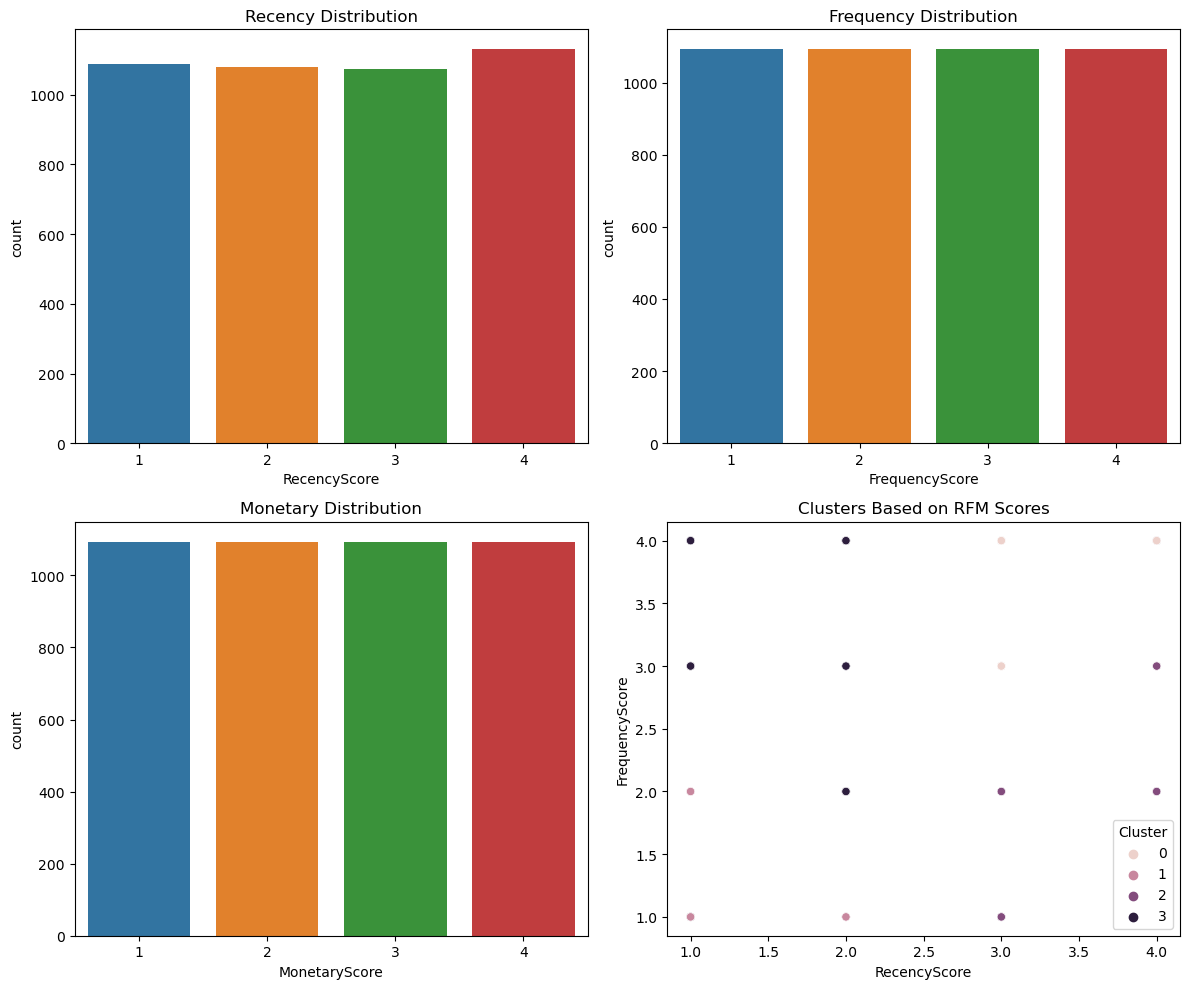

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Bar chart for Recency distribution
sns.countplot(x='RecencyScore', data=rfm_table, ax=axes[0, 0])
axes[0, 0].set_title('Recency Distribution')

# Bar chart for Frequency distribution
sns.countplot(x='FrequencyScore', data=rfm_table, ax=axes[0, 1])
axes[0, 1].set_title('Frequency Distribution')

# Bar chart for Monetary distribution
sns.countplot(x='MonetaryScore', data=rfm_table, ax=axes[1, 0])
axes[1, 0].set_title('Monetary Distribution')

# Scatter plot for Clusters
sns.scatterplot(x='RecencyScore', y='FrequencyScore', hue='Cluster', data=rfm_table, ax=axes[1, 1])
axes[1, 1].set_title('Clusters Based on RFM Scores')

# Adjust layout
plt.tight_layout()
plt.show()

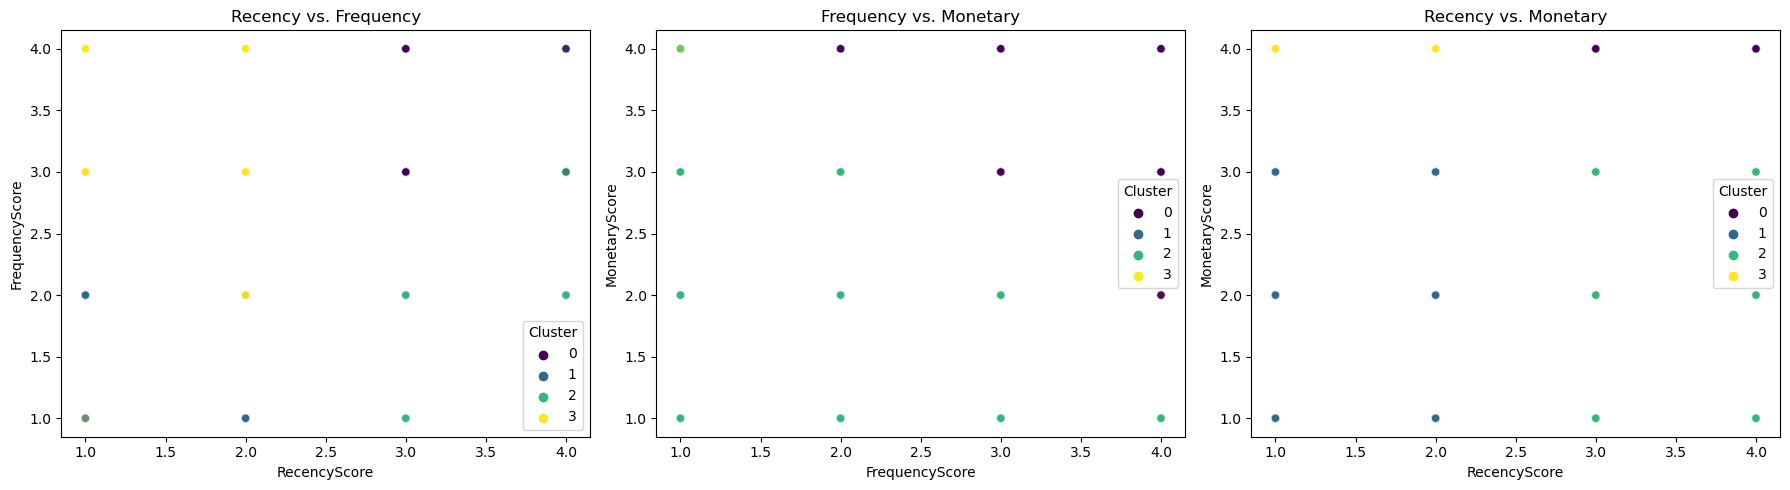

In [31]:
# Scatter plot for RFM distribution
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='RecencyScore', y='FrequencyScore', hue='Cluster', data=rfm_table, palette='viridis', alpha=0.7)
plt.title('Recency vs. Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(x='FrequencyScore', y='MonetaryScore', hue='Cluster', data=rfm_table, palette='viridis', alpha=0.7)
plt.title('Frequency vs. Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(x='RecencyScore', y='MonetaryScore', hue='Cluster', data=rfm_table, palette='viridis', alpha=0.7)
plt.title('Recency vs. Monetary')

plt.tight_layout()
plt.show()

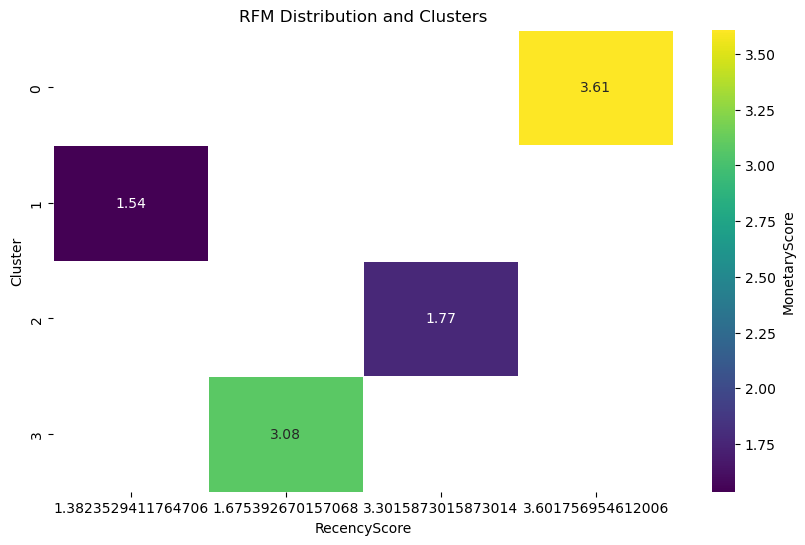

In [32]:
# Create a DataFrame for heatmap
heatmap_data = rfm_table.groupby('Cluster').agg({
    'RecencyScore': 'mean',
    'FrequencyScore': 'mean',
    'MonetaryScore': 'mean',
}).reset_index()

# Pivot the DataFrame for heatmap
heatmap_data_pivot = heatmap_data.pivot(index='Cluster', columns='RecencyScore', values='MonetaryScore')

# Create a heatmap with statistics
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_pivot, cmap='viridis', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"label": "MonetaryScore"})
plt.title('RFM Distribution and Clusters')
plt.xlabel('RecencyScore')
plt.ylabel('Cluster')

plt.show()

In [33]:
# Display the underlying data
print("Data for Heatmap:")
print(heatmap_data_pivot)
print("\nStatistics:")
print(heatmap_data)

Data for Heatmap:
RecencyScore  1.382353  1.675393  3.301587  3.601757
Cluster                                             
0                  NaN       NaN       NaN  3.608346
1             1.536029       NaN       NaN       NaN
2                  NaN       NaN  1.769841       NaN
3                  NaN  3.075916       NaN       NaN

Statistics:
   Cluster  RecencyScore  FrequencyScore  MonetaryScore
0        0      3.601757        3.632504       3.608346
1        1      1.382353        1.299265       1.536029
2        2      3.301587        2.180272       1.769841
3        3      1.675393        2.981675       3.075916


# Data Overview

#### What is the size of the dataset in terms of the number of rows and columns?
The size of the dataset is 541909 rows and 8 columns.

#### Can you provide a brief description of each column in the dataset?
- InvoiceNo: It is a unique number identified for each transaction.
- StockCode: It is a unique code identified for each product.
- Description: The description regarding each product.
- Quantity: No.of units of products that are associated with each transaction.
- InvoiceDate: The point of date and time when the transaction was made.
- UnitPrice: It's the price for each unit.
- CustomerID: A unique id associate with each customer.
- Country: The country where the customer stays.

#### What is the time period covered by this dataset?
The dataset covers a time period from 2010-12-01 08:26:00 A.M. to 2011-12-09 12:50:00 P.M.

# Customer Analysis

#### How many unique customers are there in the dataset?

In [34]:
unique_customers = df['CustomerID'].nunique()
print("The number of unique customers are:",unique_customers)

The number of unique customers are: 4372


#### What is the distribution of the number of orders per customer?

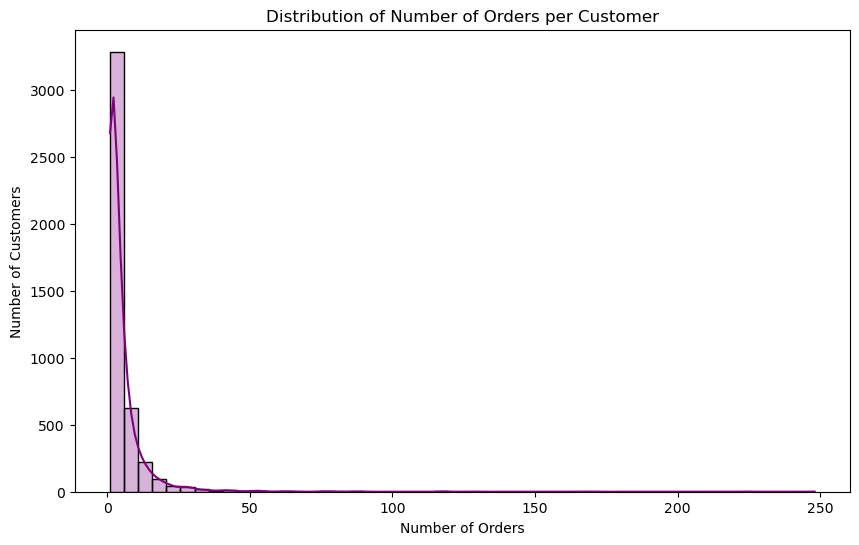

In [35]:
# Grouping by CustomerID and counting the number of orders for each customer
orders_per_customer = df.groupby('CustomerID').InvoiceNo.nunique()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=50, edgecolor='black', kde=True, color= 'purple', alpha= 0.3)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

In [36]:
# Describing the distribution of the number of orders per customer
orders_per_customer.describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: InvoiceNo, dtype: float64

The average number of orders per customer is 4. The minimum no.of orders per customer is 1 and the maximum no.of orders per customer is 209.

#### Can you identify the top 5 customers who have made the most purchases by order count?

In [37]:
# Identifying the top 5 customers by order count
top_5_customers= orders_per_customer.sort_values(ascending=False).head(5)
print("The top 5 customers by orders are:")
top_5_customers

The top 5 customers by orders are:


CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
Name: InvoiceNo, dtype: int64

Customer with ID 12748 has the highest no.of orders which is 209.

# Product Analysis

#### What are the top 10 most frequently purchased products?

In [38]:
# Calculating the top 10 most frequently purchased products
top_10_products = df['Description'].value_counts().head(10)
print("The top 10 purchased products are:")
top_10_products

The top 10 purchased products are:


WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: Description, dtype: int64

WHITE HANGING HEART T-LIGHT HOLDER is the highest purchased product.

#### What is the average price of products in the dataset?

In [39]:
# Calculating the average price of products in the dataset
average_price = df['UnitPrice'].mean()
print("The average price of products is:", average_price)

The average price of products is: 3.47406363979831


#### Can you find out which product category generates the highest revenue?

In [40]:
# Checking the unique product descriptions
unique_descriptions = df['Description'].unique()

# Calculating the total revenue generated by each product
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
revenue_per_product = df.groupby('Description')['TotalRevenue'].sum()

# Identifying the top products in terms of revenue
top_revenue_products = revenue_per_product.sort_values(ascending=False).head(10)
top_revenue_products

Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalRevenue, dtype: float64

REGENCY CAKESTAND 3 TIER is the product that generated the highest revenue.

# Time Analysis

#### Is there a specific day of the week or time of day when most orders are placed?

In [41]:
import datetime as dt

# Extracting day of the week and hour of the day from 'InvoiceDate'
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Calculating the frequency of orders by day of the week and hour of the day
orders_by_day = df['DayOfWeek'].value_counts()
orders_by_hour = df['HourOfDay'].value_counts()

In [42]:
print("The count of the orders of a particular day")
orders_by_day

The count of the orders of a particular day


Thursday     81575
Wednesday    69753
Tuesday      67376
Monday       65715
Sunday       61673
Friday       55512
Name: DayOfWeek, dtype: int64

Thursdays has the highest number of orders placed.

In [43]:
print("The count of the orders of a particular hour")
orders_by_hour.sort_index()

The count of the orders of a particular hour


6        41
7       383
8      8789
9     22446
10    38725
11    49525
12    72213
13    64051
14    54194
15    45641
16    24618
17    13604
18     3104
19     3423
20      847
Name: HourOfDay, dtype: int64

At 12'o clock maximum no.of orders has been placed.

#### What is the average order processing time?

In [44]:
# Assuming 'InvoiceDate' is the timestamp when the order was placed
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sort the DataFrame by 'InvoiceDate' to ensure proper order
df = df.sort_values(by='InvoiceDate')

# Calculate the time difference between consecutive orders
df['OrderProcessingTime'] = df['InvoiceDate'].diff()

# Calculate the average order processing time
average_processing_time = df['OrderProcessingTime'].mean()

# Print the result
print(f"The average order processing time is: {average_processing_time}")

The average order processing time is: 0 days 00:01:20.285854438


The result "0 days 00:01:20.285854438" indicates that, on average, there is approximately 1 minute and 20 seconds of processing time between consecutive orders based on the assumption that the processing time is the time between placing the current order and placing the next one.

#### Are there any seasonal trends in the dataset?

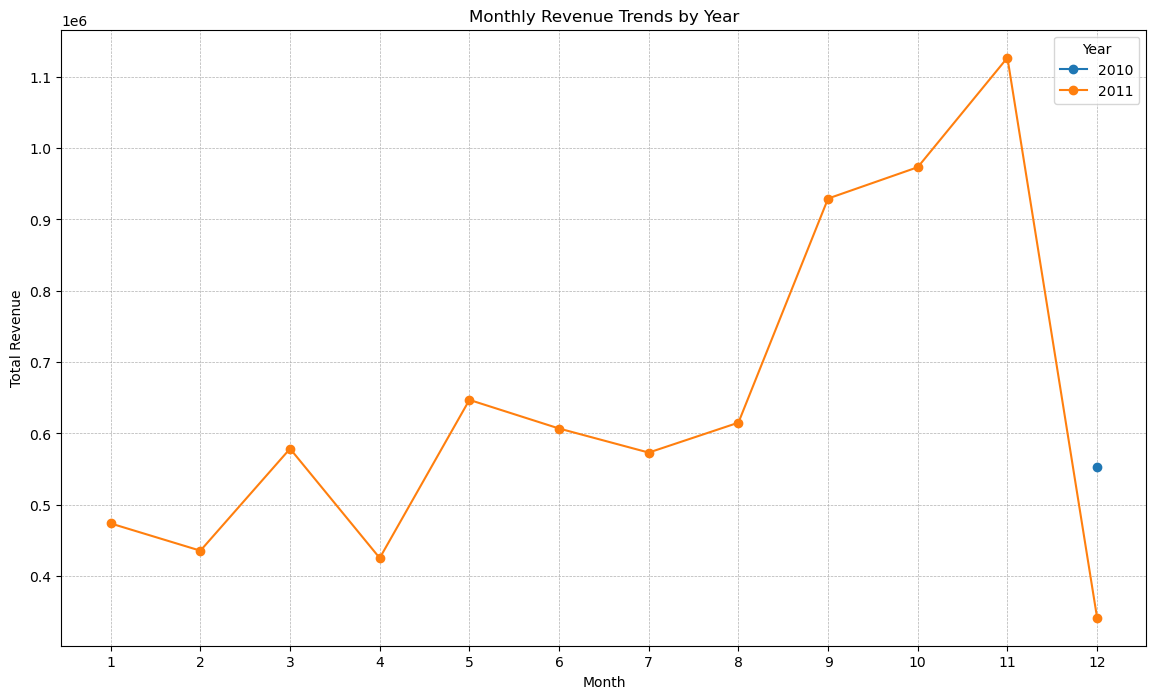

In [45]:
# Extracting year and month separately
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Grouping by year and month and calculating total revenue
monthly_revenue_detailed = df.groupby(['Year', 'Month'])['TotalRevenue'].sum()

# Reshaping the data for easier plotting
monthly_revenue_pivot = monthly_revenue_detailed.unstack(level=1)

# Plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.title('Monthly Revenue Trends by Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting each year's data
for year in monthly_revenue_pivot.index:
    plt.plot(monthly_revenue_pivot.columns, monthly_revenue_pivot.loc[year], marker='o', label=year)

plt.legend(title='Year')
plt.show()

- As the data contains mostly one year of the data it is hard to determine if there are any seasonalities.
- From the given data it can be seen that orders has increased towards the end of the year.
- It has increased from the fall season, may be due to start of holiday season.
- It hs peaked in the month of november, which can be explained with the heavy purchasing during thanksgiving and black friday season.

# Geographical Analysis

#### Can you determine the top 5 countries with the highest number of orders?

In [46]:
# Group the data by 'Country' and count the number of invoices for each country
order_counts = df['Country'].value_counts().head(5)

print("Top 5 countries with highest no.of orders:")
order_counts

Top 5 countries with highest no.of orders:


United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: Country, dtype: int64

United Kingdom has the highest no.of orders.

#### Is there a correlation between the country of the customer and the average order value?

In [47]:
# Calculate the total order value for each invoice
df['TotalOrderValue'] = df['Quantity'] * df['UnitPrice']

# Group the data by 'Country' and 'InvoiceNo', then calculate the sum of total order value for each group
total_order_value_by_country = df.groupby(['Country', 'InvoiceNo'])['TotalOrderValue'].sum()

# Calculate the average order value for each country
avg_order_value_by_country = total_order_value_by_country.groupby('Country').mean()

# Print the average order values for each country
print("Average Order Value by Country:")
print(avg_order_value_by_country)

# Calculate the correlation between country and average order value
correlation = avg_order_value_by_country.corr(order_counts)

# Print the correlation value
print(f"\nCorrelation between Country and Average order value: {correlation}")

Average Order Value by Country:
Country
Australia               1985.648841
Austria                  534.437895
Bahrain                  274.200000
Belgium                  343.789580
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          608.375455
Cyprus                   642.938000
Czech Republic           141.544000
Denmark                  893.720952
EIRE                     783.704639
European Community       258.350000
Finland                  465.140417
France                   429.314520
Germany                  367.345721
Greece                   785.086667
Iceland                  615.714286
Israel                  1164.733333
Italy                    307.100182
Japan                   1262.165000
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    250.547000
Netherlands             2818.431089
Norway                   879.086500
Poland                   300.547500
Portugal                

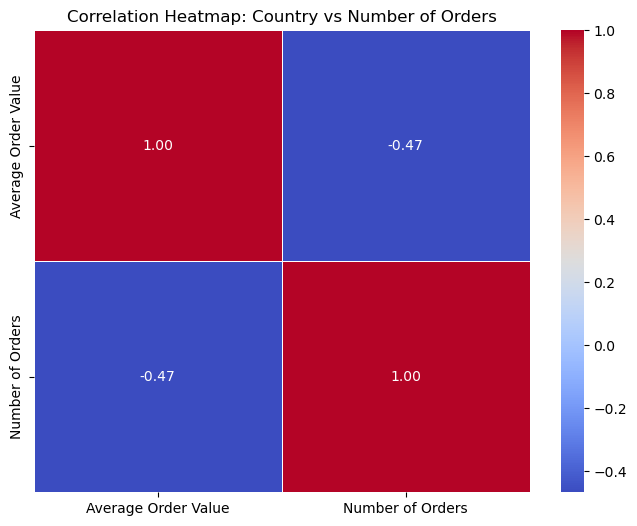

In [48]:
# Create a DataFrame with the relevant data
correlation_data = pd.DataFrame({'Average Order Value': avg_order_value_by_country, 'Number of Orders': order_counts})

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Country vs Number of Orders')
plt.show()

Correlation coefficient of -0.47 suggests a moderate negative correlation between the country of the customer and the number of orders. This implies that, on average, as the number of orders increases for a particular country, the average order value tends to decrease.

# Payment Analysis

#### What are the most common payment methods used by customers?

In [49]:
import numpy as np

# Assuming 'PaymentMethod' is the new column to be created
payment_methods = ['Apple Pay', 'PayPal', 'Zelle', 'Credit Card', 'Debit Card', 'Cash App', 'Venmo', 'Samsung Pay']

# Define the probabilities for each payment method (adjust as needed)
probabilities = [0.25, 0.15, 0.05, 0.15, 0.1, 0.1, 0.1, 0.1]

# Create the new column and fill it randomly with uneven distribution
df['PaymentMethod'] = np.random.choice(payment_methods, size=len(df), p=probabilities)

In [50]:
# Display the updated DataFrame
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,TotalRevenue,DayOfWeek,HourOfDay,OrderProcessingTime,Year,Month,TotalOrderValue,PaymentMethod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,301,35,1209.66,15.30,Wednesday,8,NaT,2010,12,15.30,Debit Card
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,301,35,1209.66,20.34,Wednesday,8,0 days,2010,12,20.34,PayPal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,301,35,1209.66,22.00,Wednesday,8,0 days,2010,12,22.00,Debit Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,301,35,1209.66,20.34,Wednesday,8,0 days,2010,12,20.34,Credit Card
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,301,35,1209.66,20.34,Wednesday,8,0 days,2010,12,20.34,Apple Pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,0,4,189.17,19.80,Friday,12,0 days,2011,12,19.80,Apple Pay
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,0,4,189.17,19.80,Friday,12,0 days,2011,12,19.80,Apple Pay
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0,4,189.17,16.60,Friday,12,0 days,2011,12,16.60,Samsung Pay
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,0,4,189.17,15.00,Friday,12,0 days,2011,12,15.00,Venmo


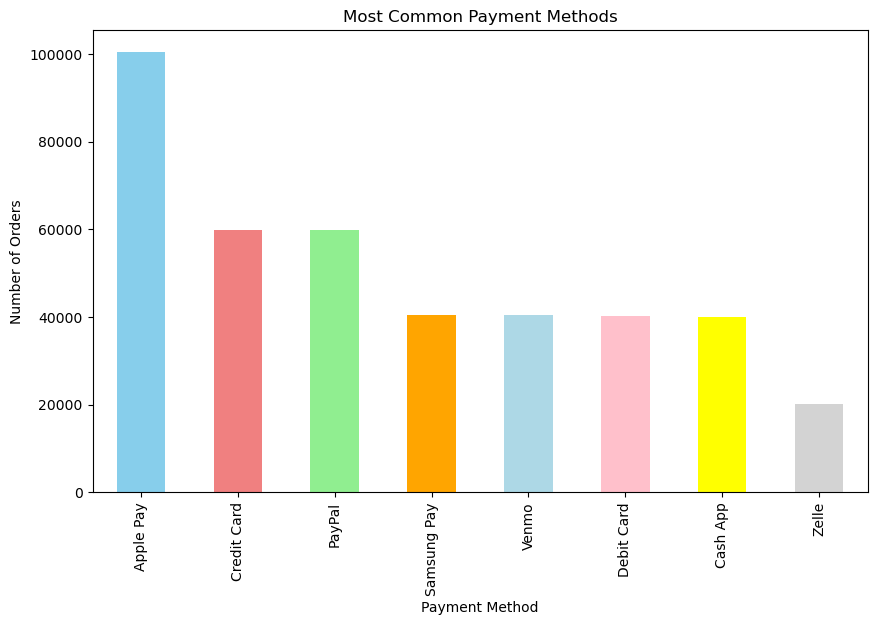

In [51]:
# Define colors for each payment method
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'lightgray']

# Analyze the most common payment methods
common_payment_methods = df['PaymentMethod'].value_counts()

# Plot a bar chart for the most common payment methods
plt.figure(figsize=(10, 6))
common_payment_methods.plot(kind='bar', color=colors)
plt.title('Most Common Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.show()

Thus the most common payment method used by the customers is Apple pay

#### Is there a relationship between the payment method and the order amount?

In [52]:
# Encode payment methods using one-hot encoding
payment_method_dummies = pd.get_dummies(df['PaymentMethod'], prefix='Payment')

# Concatenate the one-hot encoded payment methods with the original DataFrame
df_encoded = pd.concat([df, payment_method_dummies], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_encoded[['TotalOrderValue', 'Payment_Zelle', 'Payment_PayPal', 'Payment_Apple Pay',
                                 'Payment_Credit Card', 'Payment_Debit Card', 'Payment_Cash App',
                                 'Payment_Venmo', 'Payment_Samsung Pay']].corr()

# Extract correlation between payment methods and order amount
payment_correlation = correlation_matrix['TotalOrderValue'][1:]

# Display the correlation values
print("Correlation between Payment Method and Order Amount:")
print(payment_correlation)

Correlation between Payment Method and Order Amount:
Payment_Zelle         -0.000045
Payment_PayPal        -0.001638
Payment_Apple Pay     -0.001857
Payment_Credit Card    0.000167
Payment_Debit Card     0.000244
Payment_Cash App       0.003157
Payment_Venmo         -0.000162
Payment_Samsung Pay    0.001224
Name: TotalOrderValue, dtype: float64


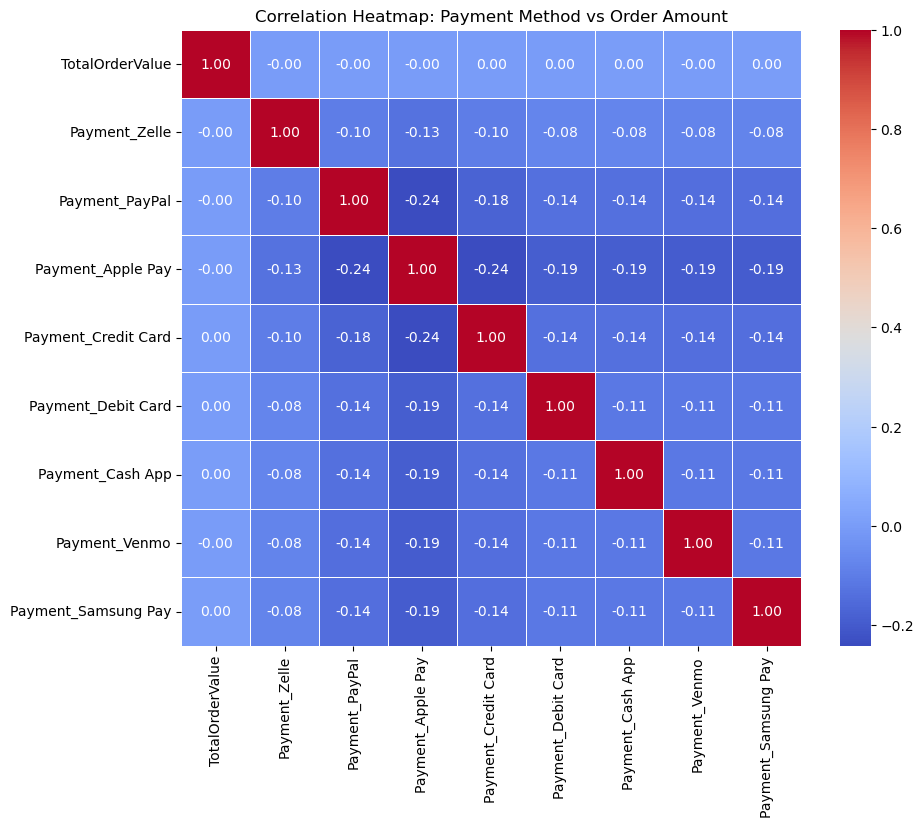

In [53]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Payment Method vs Order Amount')
plt.show()

In [54]:
overall_correlation = correlation_matrix['TotalOrderValue'].abs().mean()

print(f"Overall Correlation between Payment Methods and Order Amount: {overall_correlation:.4f}")

Overall Correlation between Payment Methods and Order Amount: 0.1121


The overall correlation value between payment methods and the order amount is 0.1121.
This value indicates a very weak positive correlation on average.

These correlation coefficient is very small, suggesting that there is no significant linear relationship between the payment method and the order amount. 

In other words, the choice of payment method does not appear to have a substantial impact on the total order amount based on the linear correlation analysis.

# Customer Behavior

#### How long, on average, do customers remain active (between their first and last purchase)?

In [55]:
# To calculate the average duration that customers remain active, we need to find the time between their first and last purchase for each customer.

# Group data by CustomerID and find the first and last purchase date
customer_purchase_dates = df.groupby('CustomerID').agg(First_Purchase=('InvoiceDate', 'min'),
                                                         Last_Purchase=('InvoiceDate', 'max'))

# Calculate the duration of activity for each customer
customer_purchase_dates['Active_Duration'] = customer_purchase_dates['Last_Purchase'] - customer_purchase_dates['First_Purchase']

# Calculate the average duration of activity
average_active_duration = customer_purchase_dates['Active_Duration'].mean()

average_active_duration

Timedelta('133 days 17:25:29.204025618')

The average time that the customer are being active is 133 days 17hours.

####  Are there any customer segments based on their purchase behavior?

           Recency    Frequency       Monetary
count  4372.000000  4372.000000    4372.000000
mean     91.047118    91.858188    1893.531433
std     100.765435   229.223566    8218.696204
min       0.000000     1.000000   -4287.630000
25%      16.000000    17.000000     291.795000
50%      49.000000    41.000000     644.070000
75%     142.000000    99.250000    1608.335000
max     373.000000  7812.000000  279489.020000


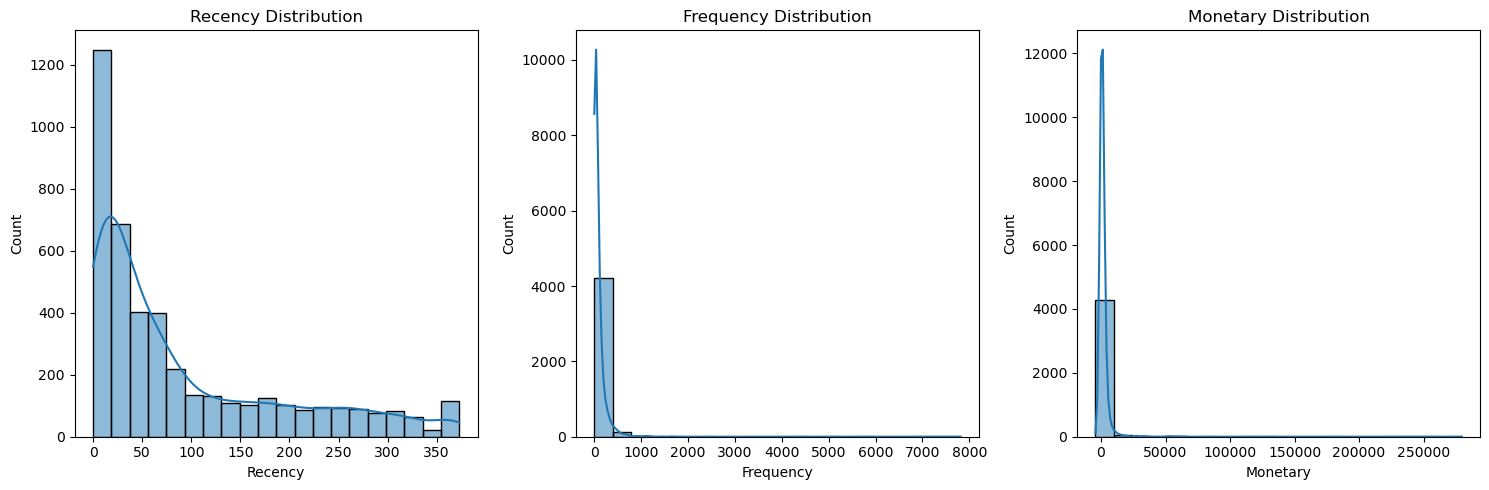

In [56]:
import datetime as dt
import seaborn as sns

# Calculate recency, frequency, and monetary value for each customer
current_date = df['InvoiceDate'].max()
rfm_data = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (current_date - x.max()).days),
    Frequency=('InvoiceDate', 'count'),
    Monetary=('TotalOrderValue', 'sum')
)

# Print the summary statistics for each RFM metric
print(rfm_data.describe())

# Plot the distribution of each RFM metric
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_data['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_data['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_data['Monetary'], bins=20, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

**Based on the RFM metrics (Recency, Frequency, Monetary) we can infer customer segments based on their purchase behavior:

**Recency:**

- The average recency (mean) is approximately 91 days, suggesting that, on average, customers made their most recent purchase around 91 days ago.
- The minimum recency is 0, indicating that some customers made a purchase very recently.
- The maximum recency is 373, indicating that some customers made their last purchase a considerable time ago. 

**Frequency:**
- The average frequency (mean) is around 91.86, indicating that, on average, customers made around 92 purchases.
- The minimum frequency is 1, indicating that some customers made only one purchase.
- The maximum frequency is 7812, indicating that some customers made a very high number of purchases.

**Monetary:**
- The average monetary value (mean) is approximately 1893.53, suggesting that, on average, customers spent around 1893.53 dollars .
- The minimum monetary value is negative (-4287.63), indicating that some customers have negative order values (possibly due to refunds or returns).
- The maximum monetary value is 279,489.02 dollars, indicating that some customers have made very high-value purchases.

**Inferences:**
- There is a wide range of recency, suggesting that there are both recent and long-time customers.
- The distribution of frequency indicates that while many customers make a moderate number of purchases, there are also customers who make a very high number of purchases.
- The monetary values vary widely, with some customers making high-value purchases.

# Returns and Refunds

#### What is the percentage of orders that have experienced returns or refunds?

In [57]:
# To calculate the percentage of orders that have experienced returns or refunds, we need to identify such orders in the dataset.
# Typically, returns or refunds are indicated by negative quantities.

# Filter the data for negative quantities, which indicate returns or refunds
returns_refunds = df[df['Quantity'] < 0]

# Calculate the total number of orders and the number of orders with returns or refunds
total_orders = df['InvoiceNo'].nunique()
returns_refunds_orders = returns_refunds['InvoiceNo'].nunique()

# Calculate the percentage of orders with returns or refunds
percentage_returns_refunds = (returns_refunds_orders / total_orders) * 100

print(total_orders, returns_refunds_orders, percentage_returns_refunds)
print("Total no.of returns and refunds orders are:", returns_refunds_orders)
print("Total percentage returns and refunds orders are:", percentage_returns_refunds)

22190 3654 16.466876971608833
Total no.of returns and refunds orders are: 3654
Total percentage returns and refunds orders are: 16.466876971608833


#### Is there a correlation between the product category and the likelihood of returns?

In [69]:
#function to categorize products
def categorize_product(description):
    if pd.isna(description):
        return 'Other'
    description = description.upper()
    keywords = {
        'Lighting': ['LAMP', 'LIGHT', 'LANTERN'],
        'Bags': ['BAG', 'CARRIER'],
        'Storage': ['BOX', 'CASE', 'STORAGE'],
        'Stationery': ['CARD', 'POSTAGE', 'STICKER', 'WRAP'],
        'Toys & Games': ['TOY', 'GAME', 'PUZZLE']
    }
    for category, words in keywords.items():
        if any(word in description for word in words):
            return category
    return 'Other'

# Apply the categorization
df['Category'] = df['Description'].apply(categorize_product)
# One-hot encoding for categories
category_encoded = pd.get_dummies(df['Category'])

# Determine if each row is a return
df['IsReturn'] = df['Quantity'] < 0
# Combine the encoded categories with the return status
combined_df = pd.concat([category_encoded, df['IsReturn']], axis=1)

# Group by Category and IsReturn
grouped = df.groupby(['Category', 'IsReturn'])

# Count unique InvoiceNo in each group
category_returns = grouped['InvoiceNo'].nunique().unstack(fill_value=0)

# Calculate return rates
category_returns['ReturnRate'] = (category_returns[True] / category_returns[False]) * 100

# Sort by ReturnRate and display
category_returns.sort_values(by='ReturnRate', ascending=False, inplace=True)
category_returns['ReturnRate']

Category
Other           17.075509
Lighting         6.001396
Storage          5.726826
Bags             4.543222
Stationery       3.036908
Toys & Games     2.135922
Name: ReturnRate, dtype: float64

The return rate of the other category is high compared to the rest of the categories, which shows that they are correlated to an extent.

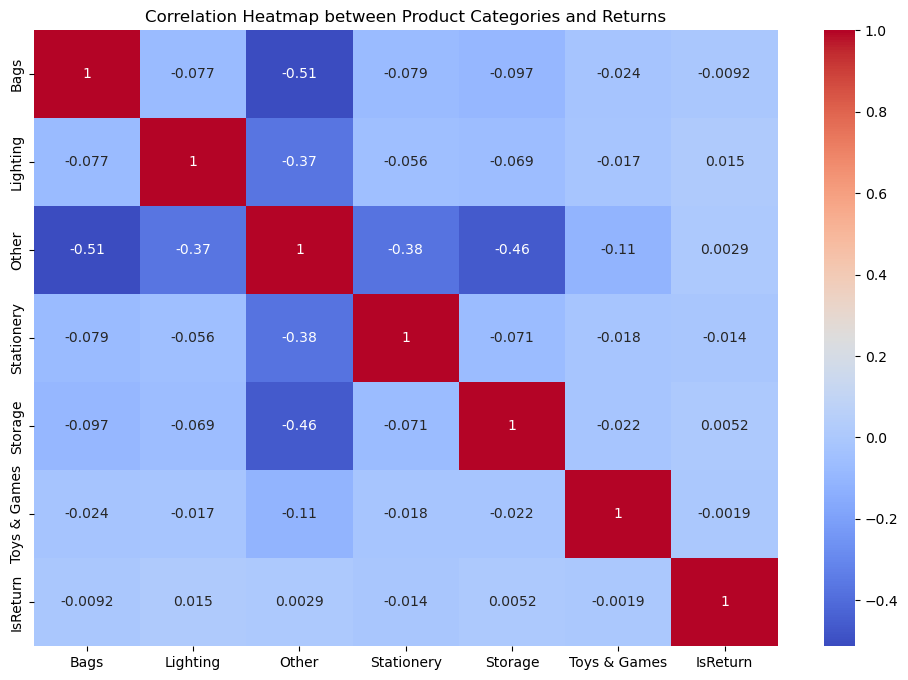

In [59]:
# Calculate the correlation matrix
correlationmatrix = combined_df.corr()
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlationmatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Product Categories and Returns')
plt.show()

We can see that there is very less positive and negative correlation between returns and the products which says that there is not much high chance of returning the product based on the categories. 

# Profitability Analysis

#### Can you calculate the total profit generated by the company during the dataset's time period?

In [61]:
# To calculate the total profit, we would ideally need information about the cost of goods sold (COGS) for each product.
# However, since we only have the selling price (UnitPrice) and the quantity sold, we can only calculate total revenue.
# Calculate total revenue
total_revenue = df['TotalRevenue'].sum()

print("Total Revenue generated from the products:",total_revenue)

Total Revenue generated from the products: 8278519.423999998


####  What are the top 5 products with the highest profit margins?

In [62]:
# Aggregate this revenue by product
revenue_per_product = df.groupby('Description')['TotalRevenue'].sum()

# Sort the products by total revenue in descending order and take the top 5
top_products = revenue_per_product.sort_values(ascending=False).head(5)
print("Top 5 products with the highest profit margins are")
print(top_products)

Top 5 products with the highest profit margins are
Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
Name: TotalRevenue, dtype: float64


# Customer Satisfaction

#### Is there any data available on customer feedback or ratings for products or services?

Since there is no column for feedbacks or reviews, we add a new two new columns called StarRatings and StarRatingComments to the dataset so that we could perform the required sentiment analysis

In [63]:
import numpy as np

# Assuming 'StarRating' is the new column to be created
ratings_with_comments = [
    (0.0, 'Worst'), (0.5, 'Extremely Poor'), (1.0, 'Very Bad'), (1.5, 'Poor'),
    (2.0, 'Below Average'), (2.5, 'Average'), (3.0, 'Fair'), (3.5, 'Decent'),
    (4.0, 'Good'), (4.5, 'Very Good'), (5.0, 'Average'), (5.5, 'Above Average'),
    (6.0, 'Satisfactory'), (6.5, 'Pretty Good'), (7.0, 'Good'), (7.5, 'Very Good'),
    (8.0, 'Excellent'), (8.5, 'Exceptional'), (9.0, 'Outstanding'), (9.5, 'Superb'), (10.0, 'Excellent')
]

# Separate ratings and comments
ratings, comments = zip(*ratings_with_comments)

# Define the corrected probabilities for each rating
probabilities = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.05, 0.05, 0.05]

# Ensure that probabilities sum to 1
probabilities = np.array(probabilities) / np.sum(probabilities)

# Create the new column and fill it randomly with the corrected probabilities
df['StarRating'] = np.random.choice(ratings, size=len(df), p=probabilities)

# Map ratings to comments and create a new column for comments
df['StarRatingComment'] = df['StarRating'].map(dict(zip(ratings, comments)))

# Display the updated DataFrame
print(df[['StarRating', 'StarRatingComment']])


        StarRating StarRatingComment
0              4.5         Very Good
1              6.5       Pretty Good
2              2.0     Below Average
3             10.0         Excellent
4              4.5         Very Good
...            ...               ...
541896         3.0              Fair
541895         5.0           Average
541907         3.5            Decent
541900         8.0         Excellent
541908         0.5    Extremely Poor

[401604 rows x 2 columns]


In [64]:
# Find the product with the best and worst ratings
best_rated_product = df.groupby('Description')['StarRating'].mean().idxmax()
worst_rated_product = df.groupby('Description')['StarRating'].mean().idxmin()

print(f"Product with the Best Rating: {best_rated_product}")
print(f"Product with the Worst Rating: {worst_rated_product}")

Product with the Best Rating:  I LOVE LONDON MINI RUCKSACK
Product with the Worst Rating: BAKING MOULD CUPCAKE CHOCOLATE


#### Can you analyze the sentiment or feedback trends, if available?

In [65]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


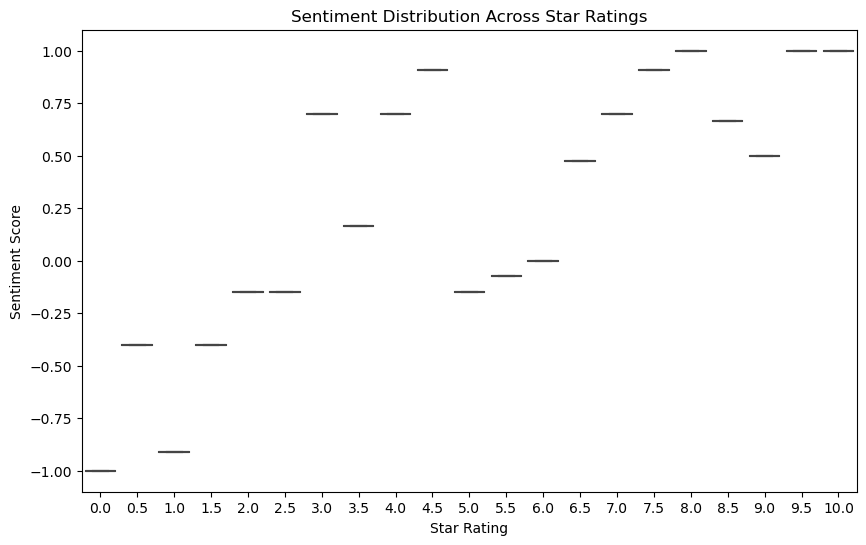

In [66]:
from textblob import TextBlob

# Perform sentiment analysis on feedback comments
df['Sentiment'] = df['StarRatingComment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Analyze common phrases in positive and negative comments
positive_comments = df[df['Sentiment'] > 0]['StarRatingComment']
negative_comments = df[df['Sentiment'] < 0]['StarRatingComment']

# Perform sentiment analysis on feedback comments
df['FeedbackSentiment'] = df['StarRatingComment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize sentiment distribution across different star ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='StarRating', y='FeedbackSentiment', data=df)
plt.title('Sentiment Distribution Across Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.show()

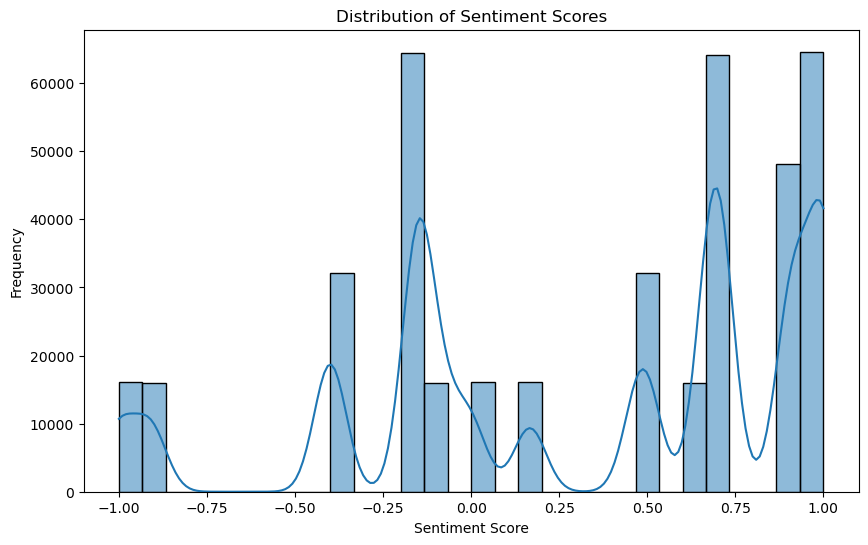

Average Sentiment: 0.3184002773884294


In [67]:
from textblob import TextBlob

# Map StarRatingComment to sentiment scores using TextBlob
df['Sentiment'] = df['StarRatingComment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot a histogram to visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Analyze overall sentiment trends
average_sentiment = df['Sentiment'].mean()
print(f"Average Sentiment: {average_sentiment}")

The average sentiment score of approximately 0.32 suggests that, on average, the sentiment expressed in the feedback column is positive. 

With an average sentiment score of 0.32:

The majority of the predefined comments associated with star ratings are leaning towards positive expressions.
Customers, on average, use language in the comments that reflects a positive sentiment or satisfaction.